In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('brain_stroke.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)

In [ ]:
cat

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [ ]:
num

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [ ]:
num.remove('hypertension')
num.remove('heart_disease')

In [ ]:
num.remove('stroke')

In [ ]:
cat.append('stroke')

In [ ]:
cat.append('hypertension')
cat.append('heart_disease')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def cat_analysis(col):
    df[col].value_counts()
    sns.countplot(x=df[col])
    plt.show()

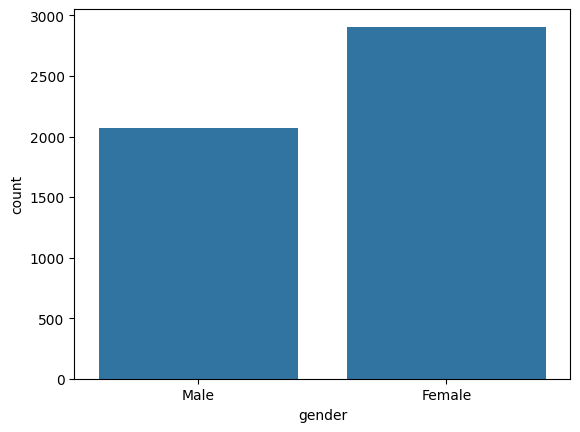

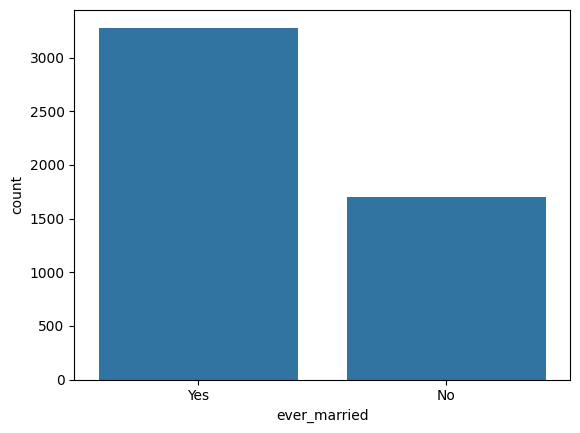

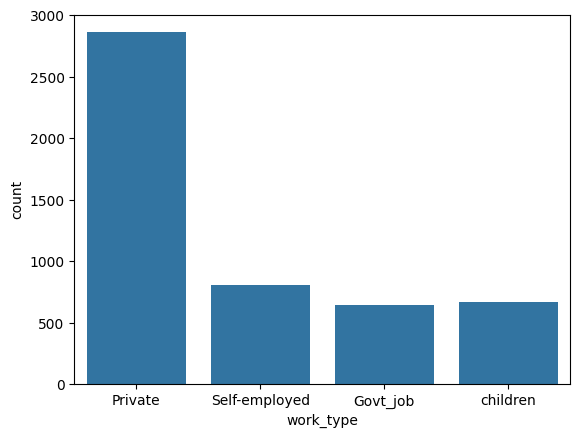

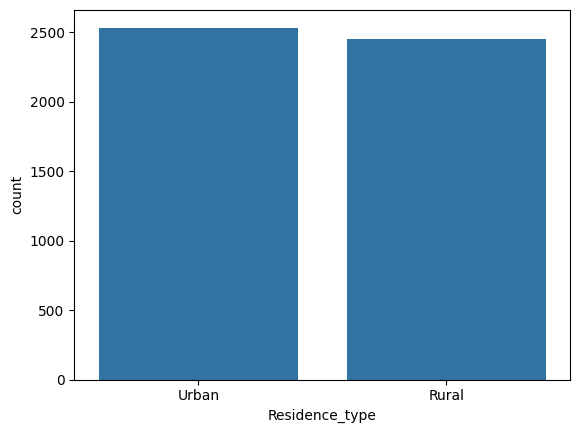

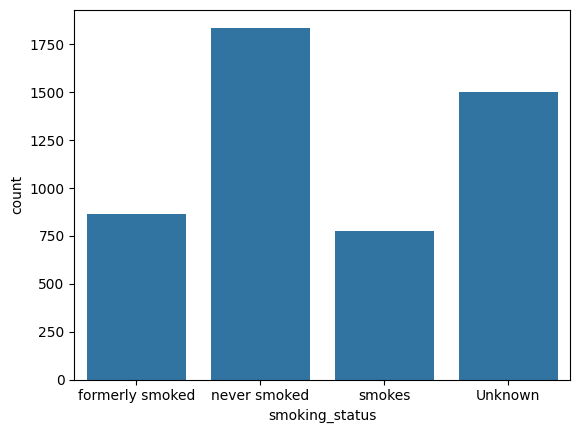

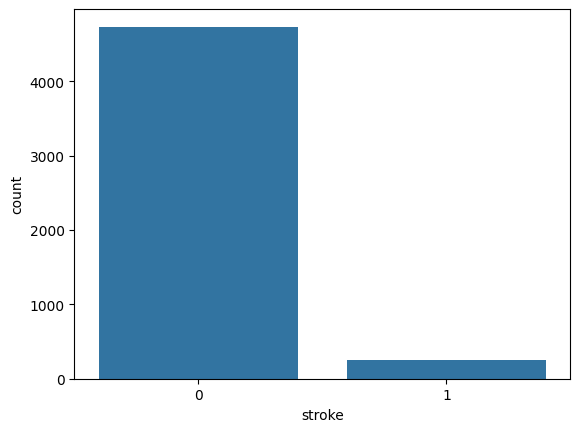

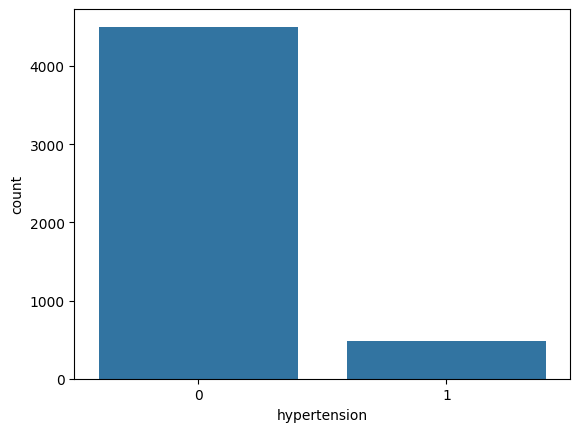

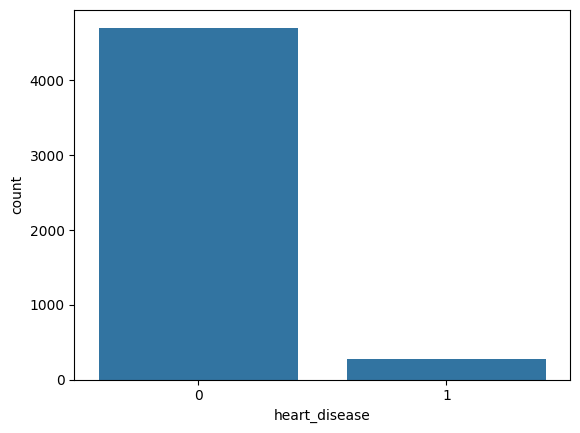

In [ ]:
for i in cat:
    cat_analysis(i)

In [ ]:
def outlier_detection_treatment(col):
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3-q1
    lf= q1- 1.5*iqr
    uf= q3+ 1.5*iqr
    outliers= df[(df[col]<lf) | (df[col]>uf)]
    print("Percentage of outliers in", col ,outliers.shape[0]*100/df.shape[0])
    fig, ax= plt.subplots(1,2, figsize=(6,4))
    ax[0].boxplot(df[col])
    ax[1].hist(df[col])
    plt.suptitle(col)
    plt.show()
    df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].median()

Percentage of outliers in age 0.0


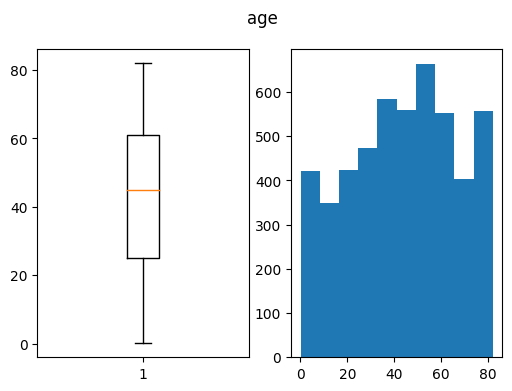

Percentage of outliers in avg_glucose_level 12.08592652077896


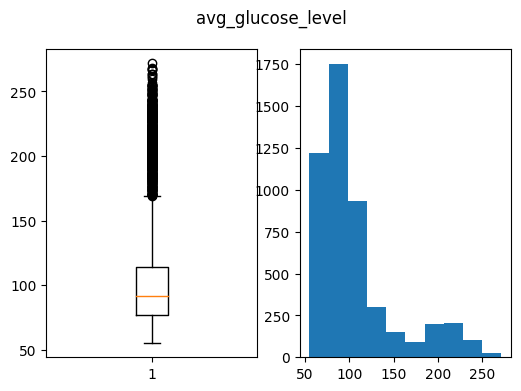

Percentage of outliers in bmi 0.8632804657699257


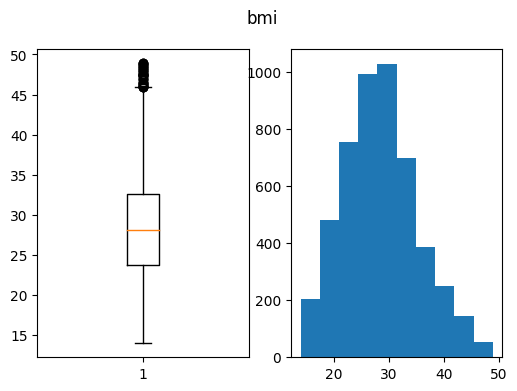

In [ ]:
for i in num:
    outlier_detection_treatment(i)

In [ ]:
df.drop(['hypertension','heart_disease'], axis=1, inplace=True)

In [ ]:
df

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,Yes,Private,Urban,91.85,36.6,formerly smoked,1
1,Male,80.0,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,Yes,Private,Urban,91.85,34.4,smokes,1
3,Female,79.0,Yes,Self-employed,Rural,91.85,24.0,never smoked,1
4,Male,81.0,Yes,Private,Urban,91.85,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,Yes,Private,Urban,91.85,31.1,smokes,0
4978,Female,45.0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,Yes,Private,Rural,83.94,30.0,smokes,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.drop(['smoking_status'],axis=1,inplace = True)

In [ ]:
le= LabelEncoder()
df['ever_married']= le.fit_transform(df['ever_married'])

In [ ]:
le= LabelEncoder()
df['Residence_type']= le.fit_transform(df['Residence_type'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke',
 'hypertension',
 'heart_disease']

In [ ]:
ohegen= OneHotEncoder(sparse_output= False)
np_gen= ohegen.fit_transform(df[["gender"]])
df_gen= pd.DataFrame(np_gen,columns= ohegen.categories_ )
df_gen.drop('Male', axis= 1, inplace=True)

In [ ]:
ohewt= OneHotEncoder(sparse_output= False)
np_wt= ohewt.fit_transform(df[["work_type"]])
df_wt= pd.DataFrame(np_wt,columns= ohewt.categories_ )
df_wt.drop('children', axis= 1, inplace=True)

In [ ]:
df_gen

,Female
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
4976,0.0
4977,0.0
4978,1.0
4979,0.0


In [ ]:
df_wt

,Govt_job,Private,Self-employed
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
4976,0.0,1.0,0.0
4977,0.0,1.0,0.0
4978,1.0,0.0,0.0
4979,0.0,1.0,0.0


In [ ]:
X= df.drop(['stroke','gender','work_type'],axis=1)
y= df['stroke']

In [ ]:
X= pd.concat([X,df_gen,df_wt],axis=1)

In [ ]:
X

,age,ever_married,Residence_type,avg_glucose_level,bmi,"(Female,)","(Govt_job,)","(Private,)","(Self-employed,)"
0,67.0,1,1,91.85,36.6,0.0,0.0,1.0,0.0
1,80.0,1,0,105.92,32.5,0.0,0.0,1.0,0.0
2,49.0,1,1,91.85,34.4,1.0,0.0,1.0,0.0
3,79.0,1,0,91.85,24.0,1.0,0.0,0.0,1.0
4,81.0,1,1,91.85,29.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0.0,0.0,1.0,0.0
4977,40.0,1,1,91.85,31.1,0.0,0.0,1.0,0.0
4978,45.0,1,0,95.02,31.8,1.0,1.0,0.0,0.0
4979,40.0,1,0,83.94,30.0,0.0,0.0,1.0,0.0


In [ ]:
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred_train))

[[3789    1]
 [ 168   26]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [ ]:
print(accuracy_score(y_train,y_pred_train))

0.9575803212851406


In [ ]:
y_pred_test= dt.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred_test))

[[939   4]
 [ 52   2]]


In [ ]:
print(accuracy_score(y_test,y_pred_test))

0.9438314944834504
